# ✈️ Airline Passenger Satisfaction - EDA for Machine Learning 🎯

In this notebook, we will perform **EDA (Exploratory Data Analysis)** to prepare the data for a **classification machine learning model** that predicts passenger satisfaction.


# Problem Statement:
The objective is to build a machine learning model that predicts airline passenger satisfaction using survey and flight-related data.
This classification task aims to identify key factors influencing satisfaction and provide actionable insights to improve service quality.
Accurately predicting satisfaction will enable airlines to enhance customer experience and retention strategies.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer


sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

## 🔽 Load and Explore the Dataset

Let's load the dataset and understand its structure.

In [2]:
df = pd.read_csv('/kaggle/input/airline-passenger-satisfaction/train.csv')
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [3]:
df.shape, df.columns

((103904, 25),
 Index(['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
        'Class', 'Flight Distance', 'Inflight wifi service',
        'Departure/Arrival time convenient', 'Ease of Online booking',
        'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
        'Inflight entertainment', 'On-board service', 'Leg room service',
        'Baggage handling', 'Checkin service', 'Inflight service',
        'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
        'satisfaction'],
       dtype='object'))

## 📋 Data Types & Missing Values
Let's check data types and identify any missing values.

In [4]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction    

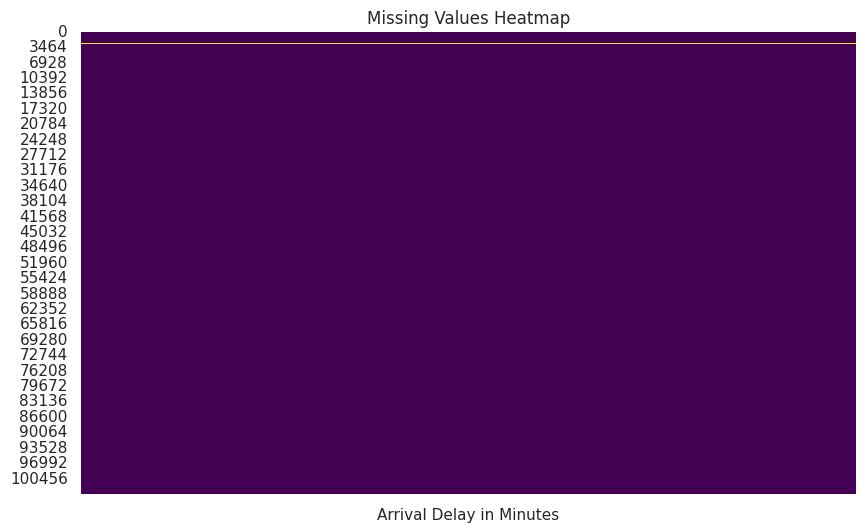

In [5]:
sns.heatmap(df[df.columns[df.isnull().any()]].isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()

## 🎯 Target Variable: `satisfaction`
Let's examine the distribution of our target variable.

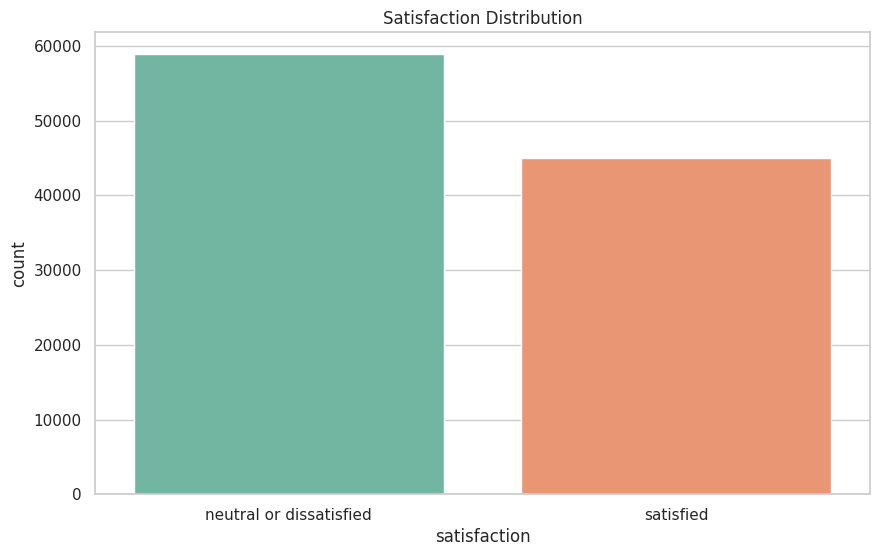

In [6]:
df['satisfaction'].value_counts(normalize=True)
sns.countplot(x='satisfaction', data=df, palette='Set2')
plt.title("Satisfaction Distribution")
plt.show()

## 🧩 Categorical Features vs Satisfaction

Let's see how satisfaction varies with features like Gender, Customer Type, Class, etc.

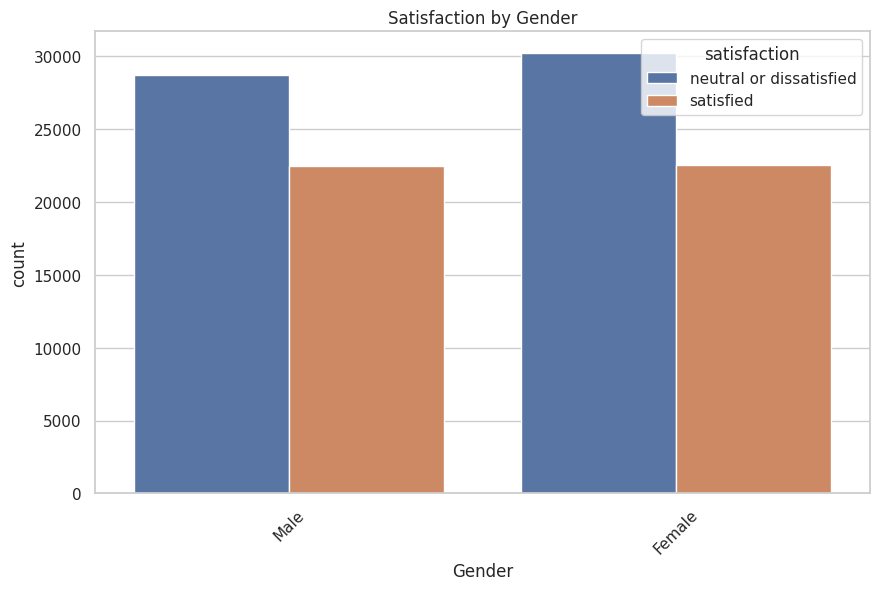

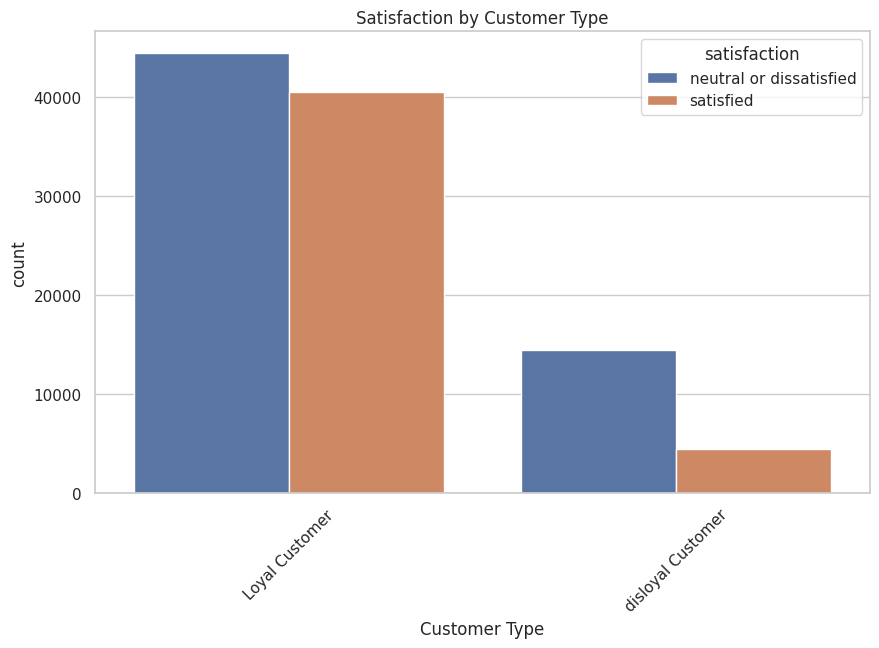

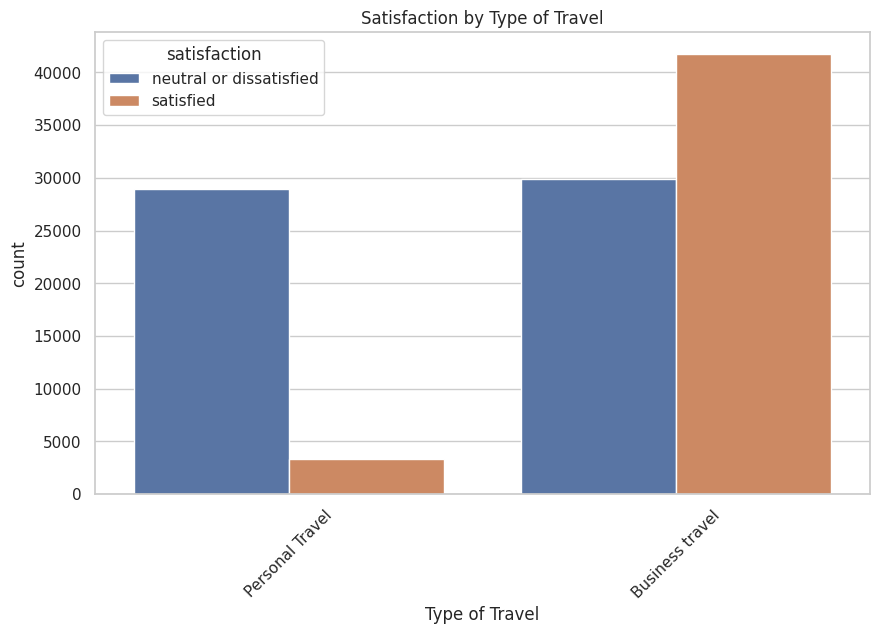

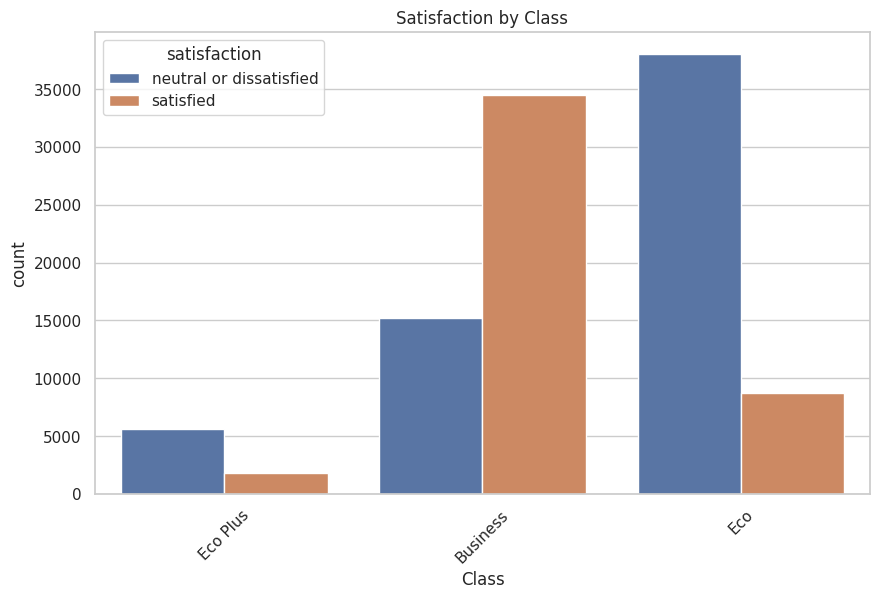

In [7]:
cat_cols = ['Gender', 'Customer Type', 'Type of Travel', 'Class']

for col in cat_cols:
    sns.countplot(data=df, x=col, hue='satisfaction')
    plt.title(f"Satisfaction by {col}")
    plt.xticks(rotation=45)
    plt.show()


## 📈 Numerical Feature Distributions
Check the distribution and relationships with satisfaction.

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


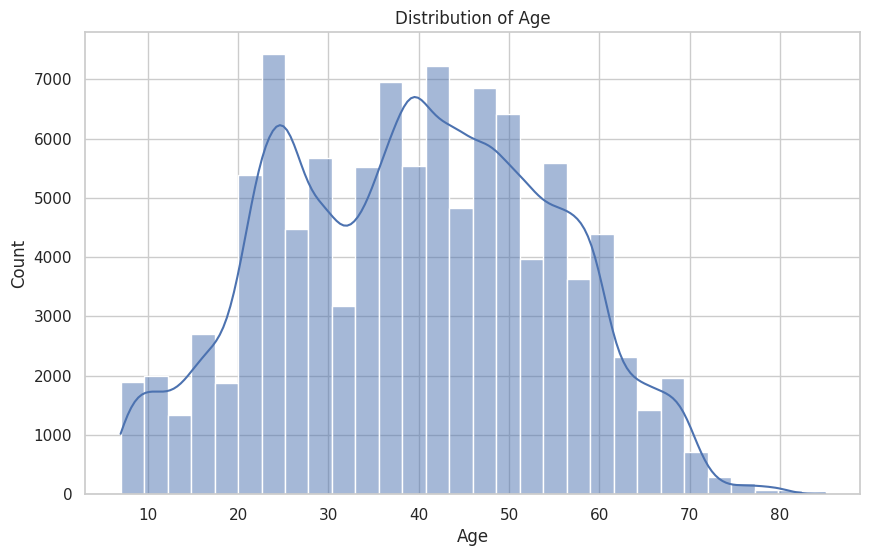

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


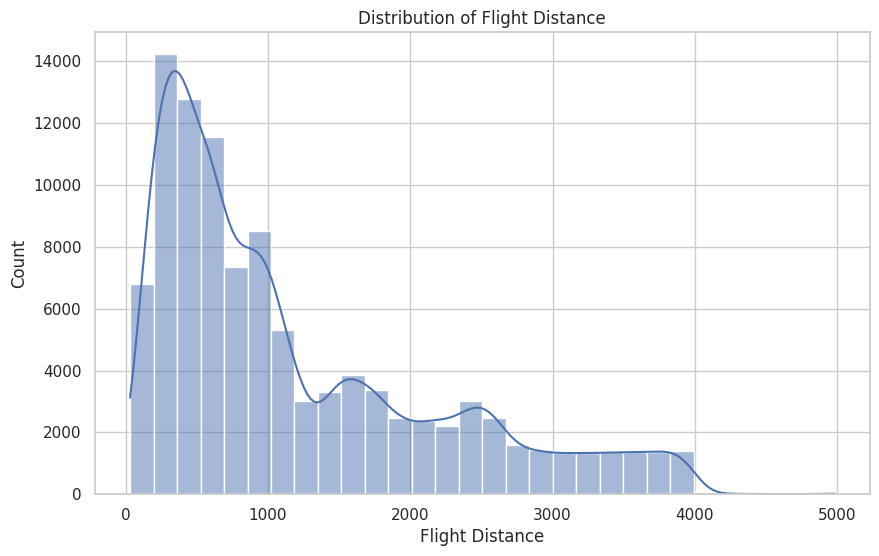

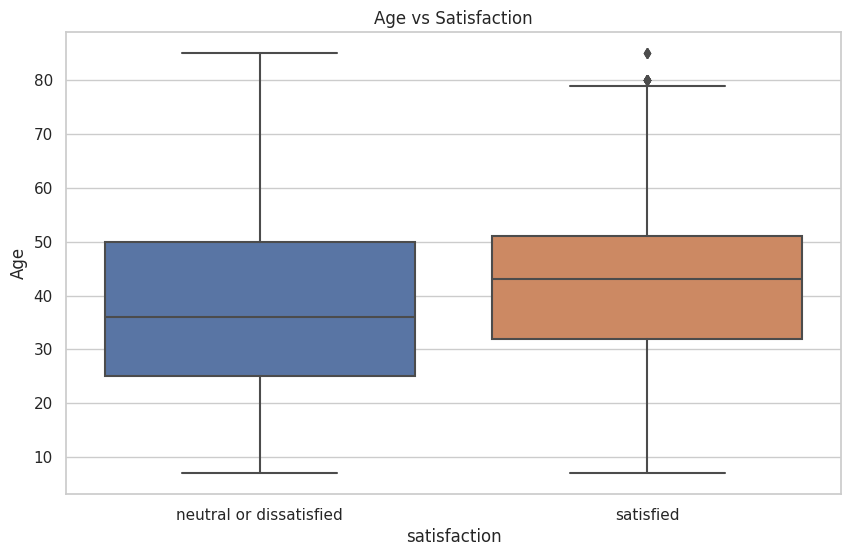

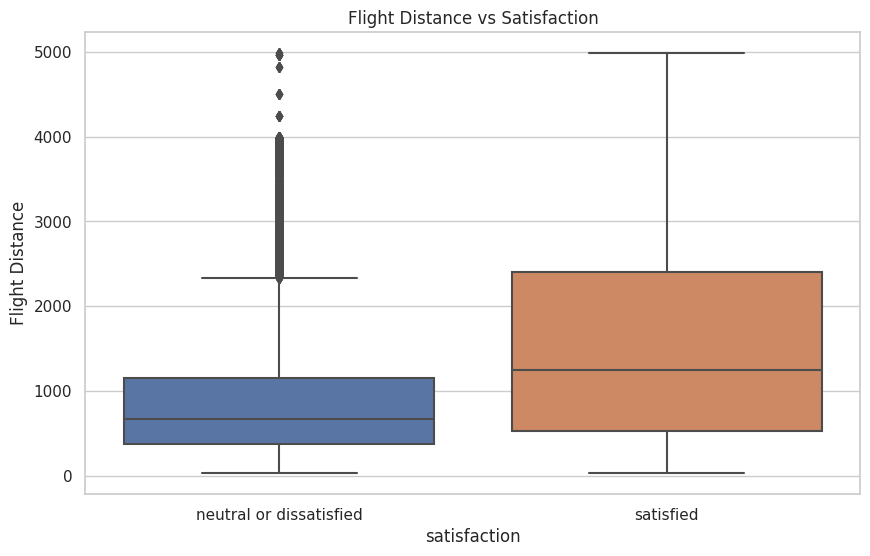

In [8]:
num_cols = ['Age', 'Flight Distance']

# Histograms
for col in num_cols:
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.show()

# Boxplots
for col in num_cols:
    sns.boxplot(x='satisfaction', y=col, data=df)
    plt.title(f"{col} vs Satisfaction")
    plt.show()

## 🔍 Correlation Between Numerical Features
Helps detect multicollinearity before modeling.

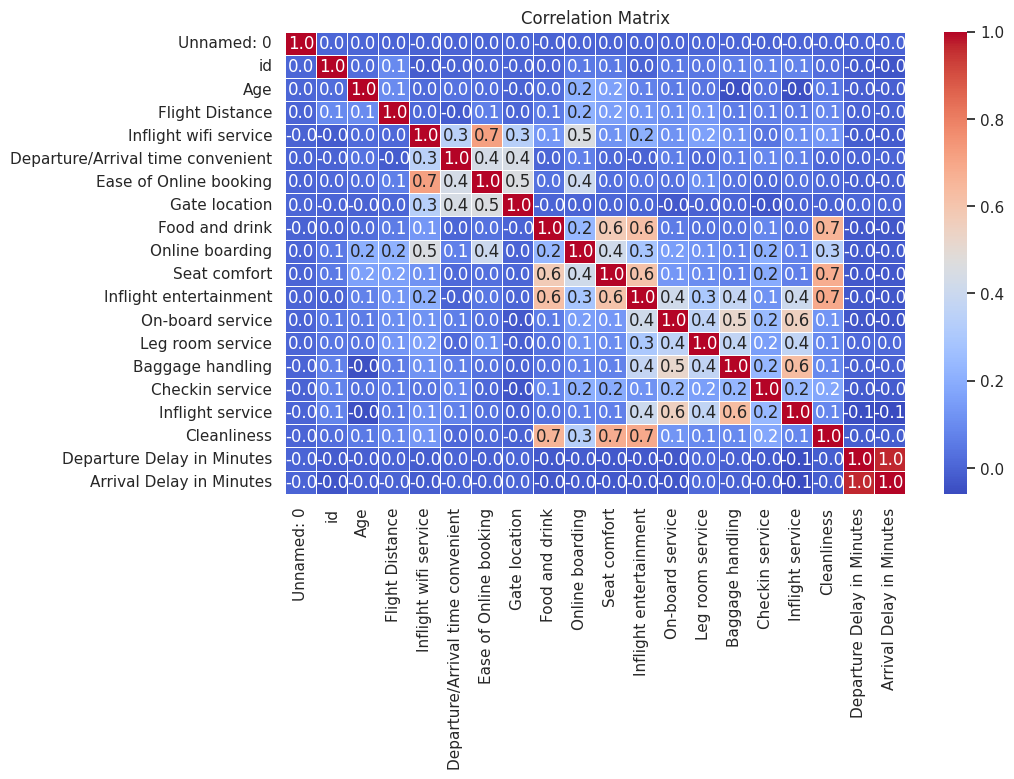

In [9]:
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, fmt=".1f", cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

# Data Preprocessing

In [10]:
# Remove unnecessary columns that don't provide useful information for the analysis
df.drop(['Unnamed: 0','id'],axis=1,inplace=True)

In [11]:
df.dropna(axis=0,inplace=True)

In [12]:
X = df.drop('satisfaction', axis=1)
y = df['satisfaction']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
categorical_cols = X.select_dtypes(include='object').iloc[:, :-1].columns
numerical_cols = X.select_dtypes(exclude='object').columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ]
)

In [14]:
X_train_encoded = preprocessor.fit_transform(X_train)
X_test_encoded = preprocessor.transform(X_test)

# Model Building
Train classification models ( Decision Tree ) to predict passenger satisfaction.

In [15]:
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['Age', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes',
       'Arrival Delay in Minutes'],
      dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['Gender', 'Customer Type', 'Type of Travel'], dtype='object'))])),
                ('classifier', DecisionTreeClassifier(random_state=42))])

# Model Evaluation

In [16]:
y_pred = pipeline.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9442058014382934
                         precision    recall  f1-score   support

neutral or dissatisfied       0.95      0.95      0.95     11655
              satisfied       0.94      0.94      0.94      9064

               accuracy                           0.94     20719
              macro avg       0.94      0.94      0.94     20719
           weighted avg       0.94      0.94      0.94     20719



# Model Interpretation

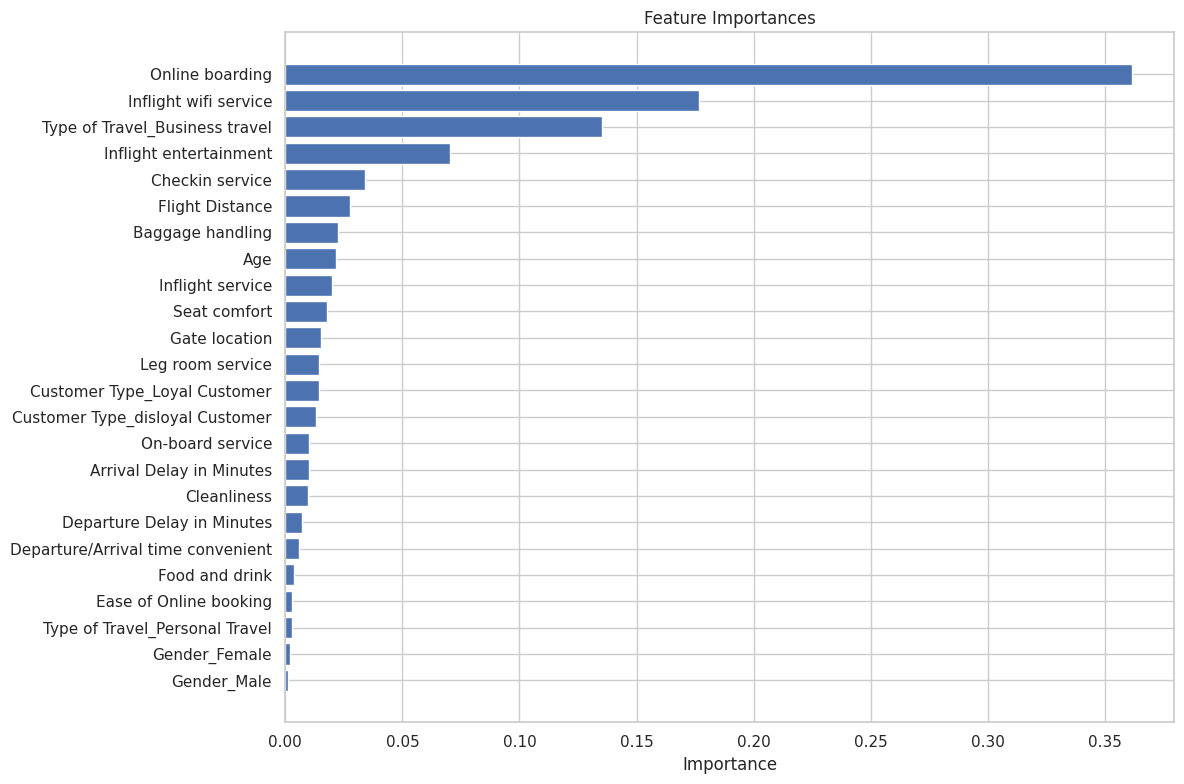

In [17]:
model = pipeline.named_steps['classifier']

num_features = numerical_cols.tolist()

cat_encoder = pipeline.named_steps['preprocessor'].named_transformers_['cat']
cat_features = cat_encoder.get_feature_names_out(categorical_cols)

feature_names = np.concatenate([num_features, cat_features])

importances = model.feature_importances_

indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.gca().invert_yaxis()
plt.xlabel("Importance")
plt.tight_layout()
plt.show()

In [18]:
top_n = 10
for i in indices[:top_n]:
    print(f"{feature_names[i]}: {importances[i]:.4f}")

Online boarding: 0.3614
Inflight wifi service: 0.1766
Type of Travel_Business travel: 0.1354
Inflight entertainment: 0.0704
Checkin service: 0.0340
Flight Distance: 0.0277
Baggage handling: 0.0226
Age: 0.0215
Inflight service: 0.0199
Seat comfort: 0.0178
